In [7]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl

from matplotlib.gridspec import GridSpec
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from collections import Counter


In [8]:

algorithm = 'mnb'
acc = '76'

year = "2021"
month = "february"

dataset_dir = 'sentiment140'
# dataset_dir = 'imdb'
# dataset_dir = 'coronaNLP'

n_gram = (1, 1)
# n_gram = (1, 2)
# n_gram = (2, 2)



In [9]:

vectorizer_path = f"../vectors/vectorizer_{dataset_dir}_{n_gram}.pkl"

model_path = f"../models/{algorithm.lower()}_{dataset_dir}_{acc}_{n_gram}.pkl"

# already processed
df = pd.read_csv(f'../{year}-data/covid-{month}.csv', delimiter=',')

df = df.drop_duplicates()

df = df[['tweet', 'sentiment']]

tfidf = joblib.load(vectorizer_path)

model = joblib.load(model_path)


In [10]:
model

Pipeline(steps=[('clf', MultinomialNB(alpha=5))])

In [11]:

tfidf.vocabulary_

{'awww': 37099,
 'bummer': 59933,
 'shoulda': 305010,
 'got': 138509,
 'david': 88619,
 'carr': 65307,
 'third': 338117,
 'day': 88806,
 'upset': 360041,
 'cant': 64165,
 'updat': 359465,
 'facebook': 114892,
 'text': 334507,
 'might': 212886,
 'cri': 83243,
 'result': 286156,
 'school': 296893,
 'today': 342862,
 'also': 24825,
 'blah': 50043,
 'dive': 96609,
 'mani': 204454,
 'time': 340711,
 'ball': 40187,
 'manag': 204030,
 'save': 295538,
 '50': 10596,
 'rest': 285944,
 'go': 135939,
 'bound': 54833,
 'whole': 374656,
 'bodi': 52317,
 'feel': 118226,
 'itchi': 169868,
 'like': 192526,
 'fire': 120735,
 'behav': 45014,
 'im': 164137,
 'mad': 202031,
 'whi': 374053,
 'becaus': 43745,
 'see': 298976,
 'crew': 83205,
 'need': 227847,
 'hug': 159540,
 'hey': 152117,
 'long': 196289,
 'yes': 386674,
 'rain': 279810,
 'bit': 49195,
 'onli': 242142,
 'lol': 195407,
 'fine': 120365,
 'thank': 335048,
 'k': 177855,
 'nope': 234021,
 'didnt': 94349,
 'que': 267181,
 'muera': 222407,
 'spring

In [12]:
tfidf.idf_

array([ 8.72133598, 10.85642878, 11.69175045, ..., 14.58212221,
       14.58212221, 14.58212221])

In [13]:

X = df.iloc[:, 0].fillna(' ')

tweets = X

num_of_tweets_analyzed = len(tweets)

In [14]:

y_pred = tfidf.transform(X)
y_pred

<20482x391828 sparse matrix of type '<class 'numpy.float64'>'
	with 523640 stored elements in Compressed Sparse Row format>

In [15]:

predictions = model.predict(y_pred)
predictions

array([1, 0, 1, ..., 0, 0, 1])

C:\Users\Enes\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

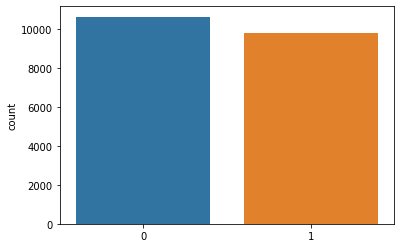

In [16]:
import seaborn as sns

sns.countplot(predictions)

In [ ]:

# saving tweets to csv
tweets.to_csv(f'./analysis/tweets-{month}-{year}.csv')
# saving sentiment predictions to csv
np.savetxt(f'./analysis/predictions-{month}-{year}.csv',
           predictions, delimiter=',', fmt=('%s'))

# adding sentiment column to the beginning
df = pd.read_csv(f'./analysis/predictions-{month}-{year}.csv', header=None)
df.rename(columns={0: 'sentiment'}, inplace=True)
# save to new csv file
df.to_csv(f'./analysis/predictions-{month}-{year}.csv', index=False)

# merging tweets and predictions
filenames = [f'./analysis/tweets-{month}-{year}.csv',
             f'./analysis/predictions-{month}-{year}.csv']
dfs = []
for filename in filenames:
    # read the csv, making sure the first two columns are str
    df = pd.read_csv(filename, header=None, converters={0: str, 1: str})
    # change the column names so they won't collide during concatenation
    df.columns = [filename + str(cname) for cname in df.columns]
    dfs.append(df)

# concatenate them horizontally
merged = pd.concat(dfs, axis=1)
# write it out
merged.to_csv(f"./analysis/merged-{month}-{year}.csv", header=None, index=None)

df = pd.read_csv(f'./analysis/merged-{month}-{year}.csv')

labels = ['negative', 'positive']

title_type = df.groupby('sentiment').agg('count')

type_labels = ['positive', 'negative']
type_counts = title_type.tweet.sort_values()

colors = ['g', 'r']

plt.subplot(
    aspect=1, title=f'Percentage of tweets pro or against vaccination in {month.capitalize()} {year}\nClassified {num_of_tweets_analyzed} tweets.')
type_show_ids = plt.pie(type_counts, labels=type_labels,
                        autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()
